In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nibabel as nb
from skimage import filters
from nilearn import plotting
from nilearn.plotting import plot_stat_map, plot_anat, plot_img, show, plot_glass_brain
from nilearn.glm.first_level import FirstLevelModel
import os

In [48]:
from nilearn import datasets

mni_atlas = datasets.load_mni152_template(resolution=None)
wm_mask = datasets.load_mni152_wm_mask()

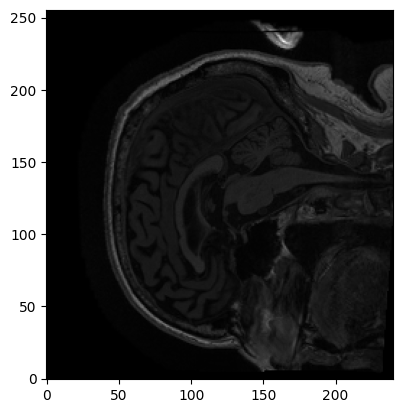

In [70]:
AD_test_nb = nb.load("../raw_data/ADNI1_Complete_3Yr_3T/AD/I31540.nii").get_fdata()
CN_test_nb = nb.load("../raw_data/ADNI1_Complete_3Yr_3T/CN/I30968.nii").get_fdata()

plt.imshow(AD_test_nb[:,:,83].T, cmap="gray", origin="lower")

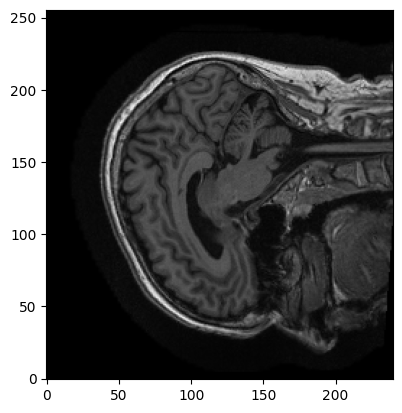

In [71]:
plt.imshow(CN_test_nb[:,:,83].T, cmap="gray", origin="lower")

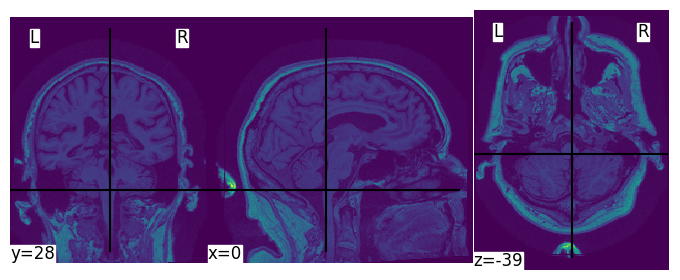

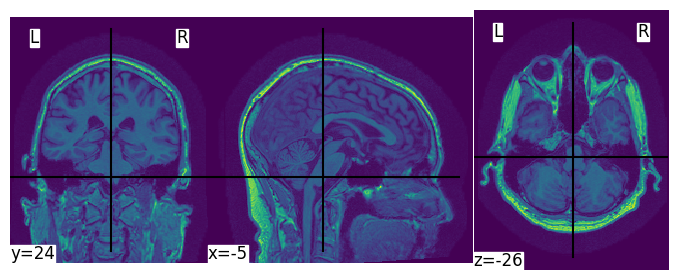

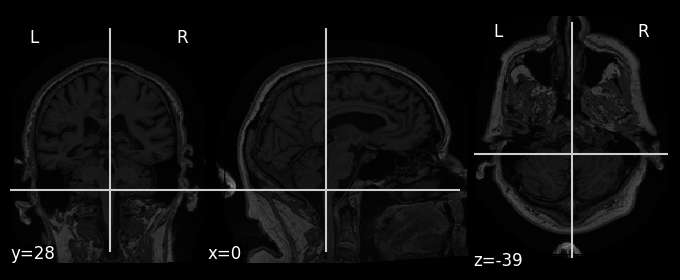

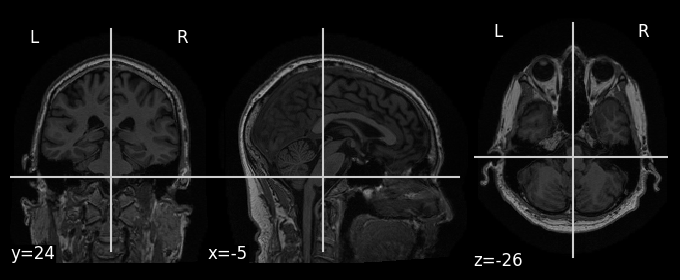

In [46]:
AD_test_img = "../raw_data/ADNI1_Complete_3Yr_3T/AD/I31540.nii"
CN_test_img = "../raw_data/ADNI1_Complete_3Yr_3T/CN/I30968.nii"

plot_img(AD_test_img)
plot_img(CN_test_img)

plot_anat(AD_test_img)
plot_anat(CN_test_img)

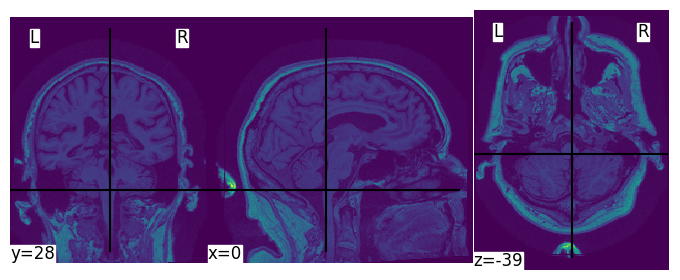

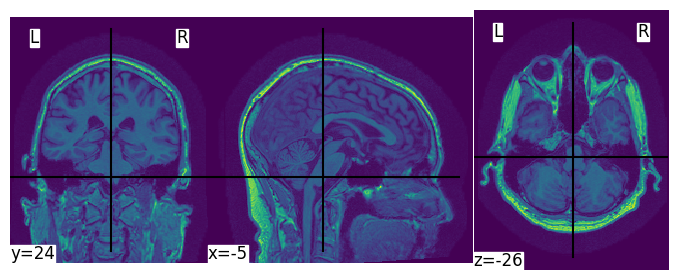

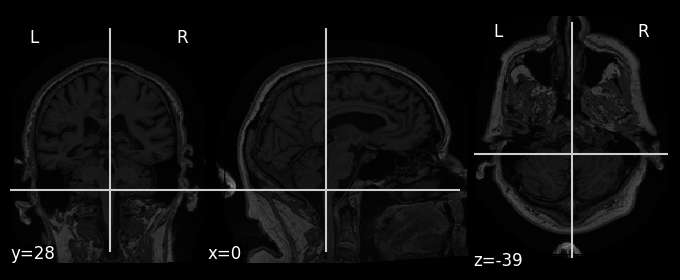

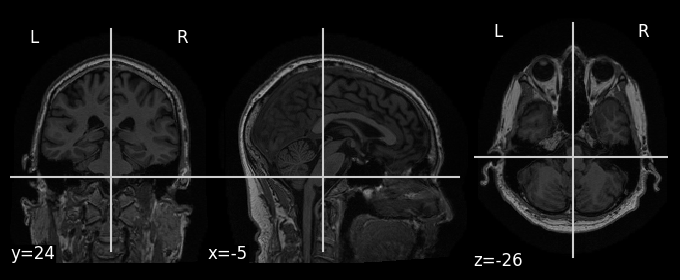

In [47]:
from nilearn.image import mean_img

AD_test_mean_img = mean_img(AD_test_img)
CN_test_mean_img = mean_img(CN_test_img)

plot_img(AD_test_mean_img)
plot_img(CN_test_mean_img)

plot_anat(AD_test_mean_img)
plot_anat(CN_test_mean_img)

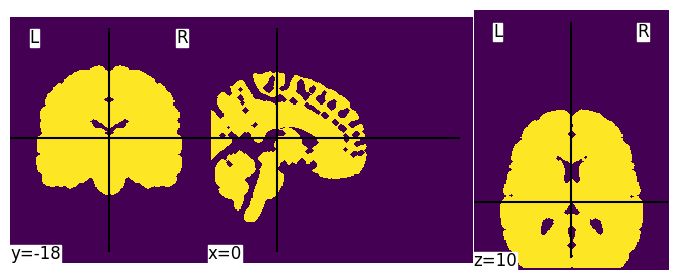

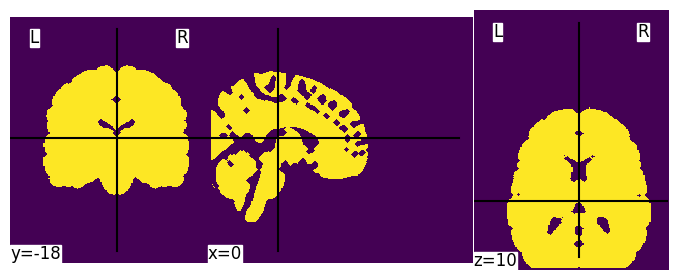

In [44]:
from nilearn.masking import compute_brain_mask

AD_mask_whole_brain = compute_brain_mask(AD_test_img, threshold=0.5, connected=True, opening=2, memory=None, verbose=0, mask_type='whole-brain')
plot_img(AD_mask_whole_brain)
CN_mask_whole_brain = compute_brain_mask(CN_test_img, threshold=0.5, connected=True, opening=2, memory=None, verbose=0, mask_type='whole-brain')
plot_img(CN_mask_whole_brain)

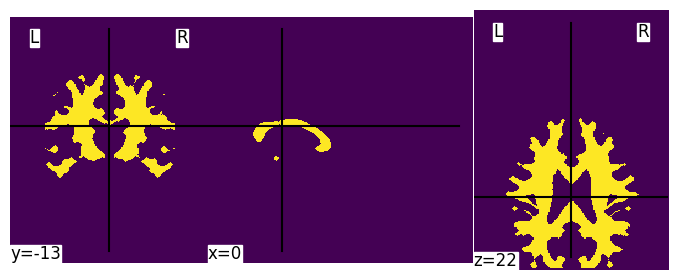

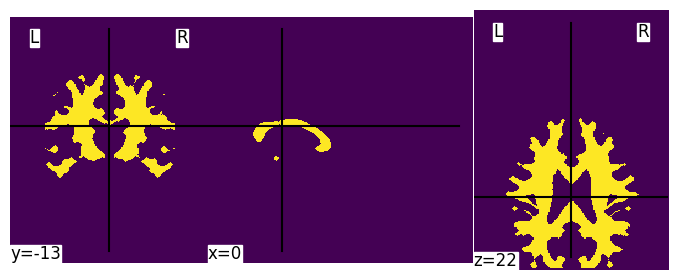

In [43]:
AD_mask_wm = compute_brain_mask(AD_test_img, threshold=0.5, connected=True, opening=2, memory=None, verbose=0, mask_type='wm')
plot_img(AD_mask_wm)
CN_mask_wm = compute_brain_mask(AD_test_img, threshold=0.5, connected=True, opening=2, memory=None, verbose=0, mask_type='wm')
plot_img(CN_mask_wm)

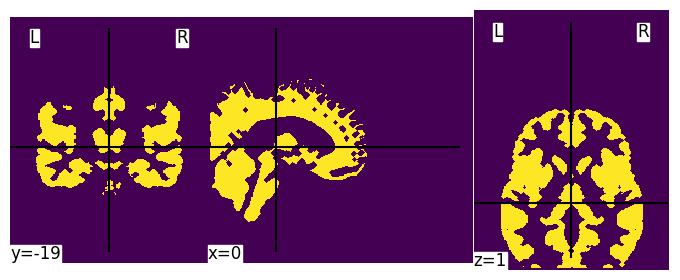

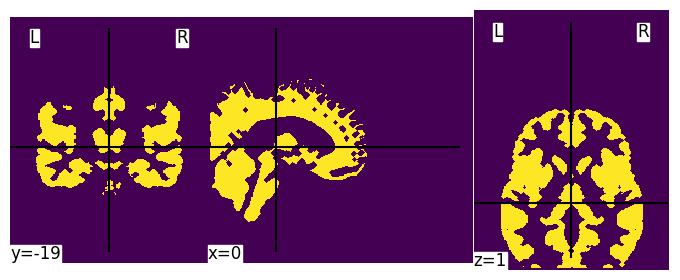

In [42]:
AD_mask_gm = compute_brain_mask(AD_test_img, threshold=0.5, connected=True, opening=2, memory=None, verbose=0, mask_type='gm')
plot_img(AD_mask_gm)
CN_mask_gm = compute_brain_mask(AD_test_img, threshold=0.5, connected=True, opening=2, memory=None, verbose=0, mask_type='gm')
plot_img(CN_mask_gm)

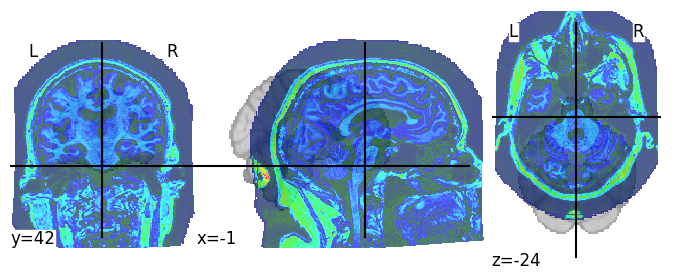

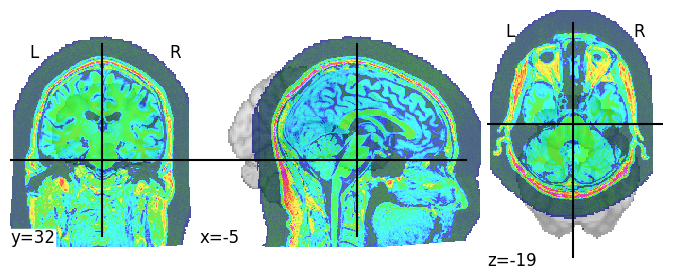

In [50]:
from nilearn.plotting import plot_roi

plot_roi(AD_test_mean_img)
plot_roi(CN_test_mean_img)

In [72]:
from nilearn.datasets import load_mni152_template
from nilearn.image import resample_to_img

template = load_mni152_template()
resampled_AD_test_mean_img = resample_to_img(AD_test_mean_img, template)
resampled_CN_test_mean_img = resample_to_img(CN_test_mean_img, template)

In [73]:
from nilearn.image import load_img

tmap_AD_test_mean_img = load_img(AD_test_mean_img)

original_AD_shape = AD_test_mean_img.shape
original_AD_affine = AD_test_mean_img.affine

resampled_AD_shape = resampled_AD_test_mean_img.shape
resampled_AD_affine = resampled_AD_test_mean_img.affine

template_img = load_img(template)
template_shape = template_img.shape
template_affine = template_img.affine
print("""Shape comparison:
- Original t-map image shape : {0}
- Resampled t-map image shape: {1}
- Template image shape       : {2}
""".format(original_AD_shape, resampled_AD_shape, template_shape))

print("""Affine comparison:
- Original t-map image affine :\n {0}
- Resampled t-map image affine:\n {1}
- Template image affine       :\n {2}
""".format(original_AD_affine, resampled_AD_affine, template_affine))



Shape comparison:
- Original t-map image shape : (240, 256, 160)
- Resampled t-map image shape: (99, 117, 95)
- Template image shape       : (99, 117, 95)

Affine comparison:
- Original t-map image affine :
 [[ 3.41904455e-08  2.62452278e-04 -1.20499201e+00  9.54000015e+01]
 [-2.61352916e-04 -1.00309699e+00 -3.15276481e-04  1.70000000e+02]
 [-9.98886968e-01  2.62454452e-04  4.12451209e-08  1.28000000e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
- Resampled t-map image affine:
 [[   2.    0.    0.  -98.]
 [   0.    2.    0. -134.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
- Template image affine       :
 [[   2.    0.    0.  -98.]
 [   0.    2.    0. -134.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]



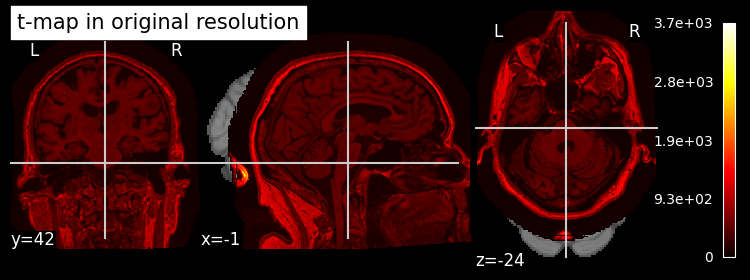

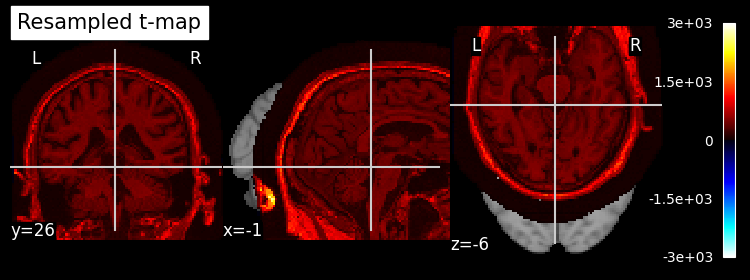

In [76]:
from nilearn import plotting

plotting.plot_stat_map(AD_test_mean_img,
                       bg_img=template,
                       threshold=3,
                       title="t-map in original resolution")
plotting.plot_stat_map(resampled_AD_test_mean_img,
                       bg_img=template,
                       threshold=3,
                       title="Resampled t-map")
plotting.show()

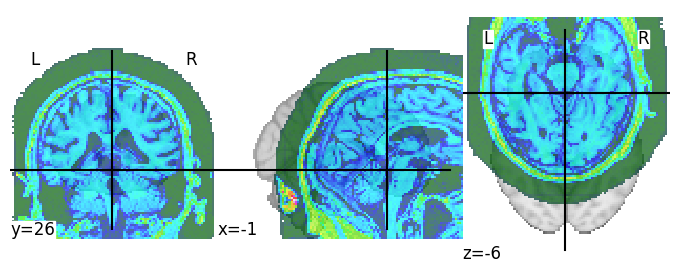

In [77]:
plot_roi(resampled_AD_test_mean_img)